生存分析を一通り試す  
1. ノンパラメトリック
2. セミパラメトリック
3. パラメトリック

データの出典はここ  
[IBM HR Analytics Employee Attrition & Performance]('https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset')

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'IPAPGothic'
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 500)

%matplotlib inline

データの点検

In [2]:
data = pd.read_csv('../input/data.csv', encoding='utf-8')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [90]:
data['Event'] = np.where(data['Attrition'] == 'Yes', 1, 0)

In [6]:
data.shape

(1470, 36)

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Event
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


pythonでsurvival analysisを行うパッケージは、[lifelines]('http://lifelines.readthedocs.io/en/latest/')というものがある  


まず、ノンパラメトリック手法の一つであるカプラン・マイヤー推定法を試す  
カプラン・マイヤー推定量を描画する  

In [8]:
from lifelines import KaplanMeierFitter

In [9]:
kmf = KaplanMeierFitter()

In [10]:
kmf.fit(data['YearsAtCompany'], event_observed=data['Event'], label='all')

<lifelines.KaplanMeierFitter: fitted with 1470 observations, 1233 censored>

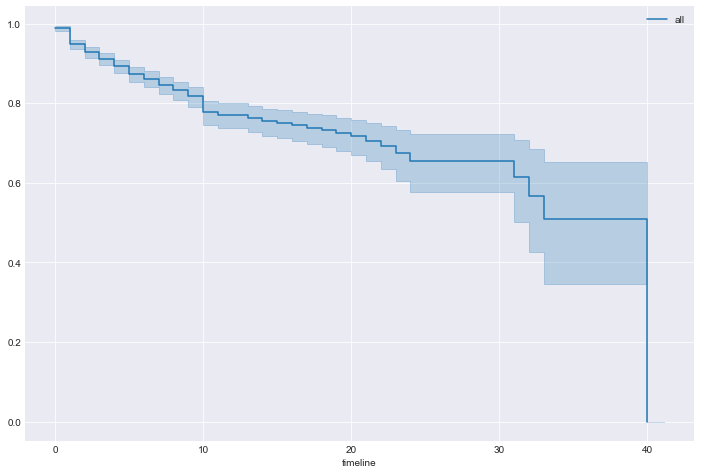

In [11]:
kmf.survival_function_
kmf.median_
kmf.plot(figsize=(12, 8))

与えられたデータから分析をすると、全ての従業員は40年働くと確実に辞める  
これは、勤続年数40年のデータが離職をした1人のみであるため

次に、2群以上のカプラン・マイヤー推定量を描画する  
部門毎の生存関数を描画する　　

In [12]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

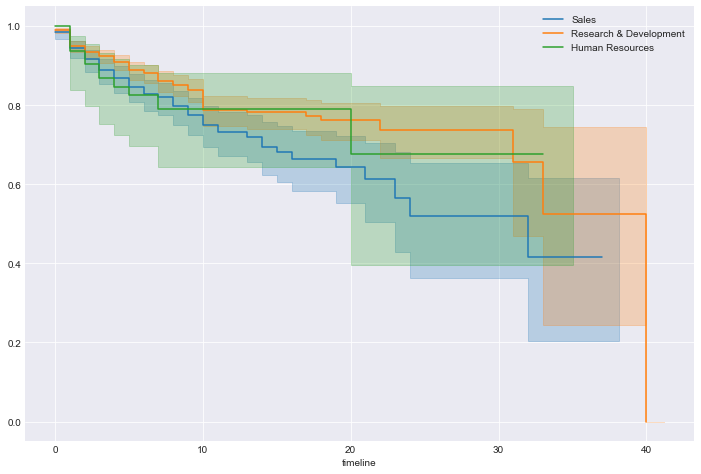

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

kmf.fit(data[data['Department'] == 'Sales']['YearsAtCompany'], data[data['Department'] == 'Sales']['Event'], label='Sales')
kmf.plot(ax=ax)

kmf.fit(data[data['Department'] == 'Research & Development']['YearsAtCompany'], data[data['Department'] == 'Research & Development']['Event'], label='Research & Development')
kmf.plot(ax=ax)

kmf.fit(data[data['Department'] == 'Human Resources']['YearsAtCompany'], data[data['Department'] == 'Human Resources']['Event'], label='Human Resources')
kmf.plot(ax=ax)

plt.show()

研究開発部門は離職率が相対的に低いことがわかる  
人事部門は分散が大きいのでデータ数が少ないかもしれない、確認する

In [14]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

人事はやはり人数が少なかったので、信頼性に注意する

次に、ネルソン・アーレン推定量も試す


In [15]:
from lifelines import NelsonAalenFitter

In [16]:
naf = NelsonAalenFitter()

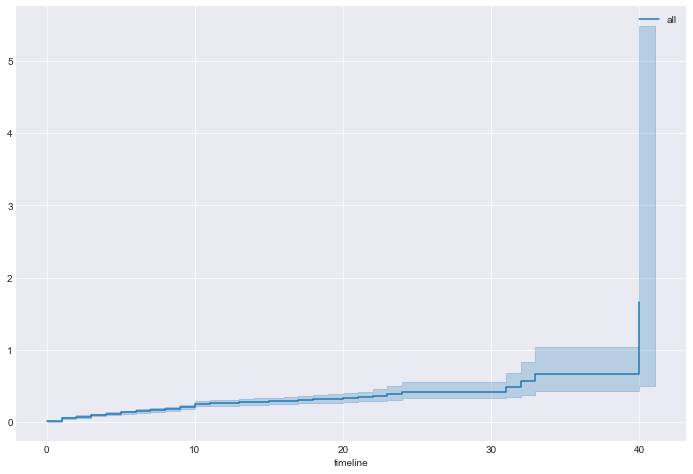

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

naf.fit(data['YearsAtCompany'], data['Event'], label='all')
naf.plot(ax=ax)

plt.show()

これは累積ハザード関数を返す

Survival Regression

Cox比例モデルを試す  
個人のlogハザード関数が、共変量による線形関数と、時期tのみによって変動するベースラインのハザード関数によって成り立っているというアイディア

$$\lambda (t | \mathbf{x}) = b_0(t) \exp (\Sigma_{i = 1}^{d} b_{i} x_{i})$$

トイデータで試す

In [18]:
from lifelines.datasets import load_regression_dataset

In [19]:
regression_dataset = load_regression_dataset()
regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


In [20]:
from lifelines import CoxPHFitter

In [21]:
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col = 'E')
cph.print_summary()

n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.2214     1.2478    0.0743 2.9807 0.0029      0.0758      0.3669  **
var2 0.0508     1.0521    0.0829 0.6129 0.5400     -0.1117      0.2133    
var3 0.2187     1.2444    0.0758 2.8851 0.0039      0.0701      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580


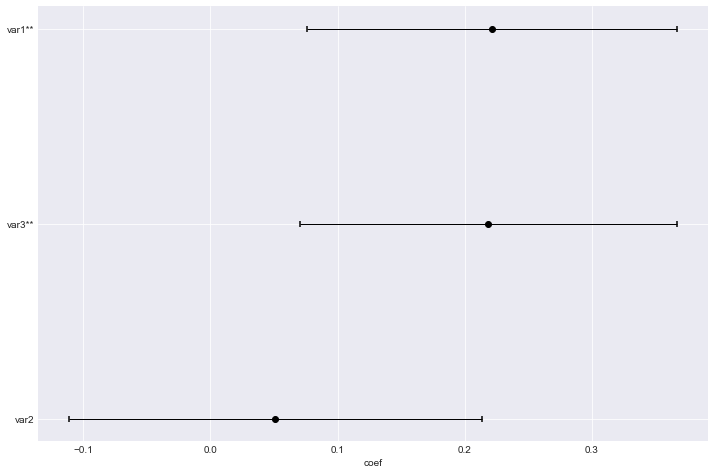

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
cph.plot(ax = ax)

plt.show()

実際のデータで試す

In [59]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Event
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [68]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

一人目のデータ  
EnvironmentSatisfaction: 2  
JobInvolvement: 3  
JobSatisfaction: 4 

In [110]:
np.exp(2 * (-0.2368) + 3 * (-0.4096) + 4 * (-0.2408))

0.0695576064465275

In [60]:
cph.fit(data[['YearsAtCompany', 'Event', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction']], 'YearsAtCompany', event_col='Event')
cph.print_summary()

n=1470, number of events=237

                           coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
EnvironmentSatisfaction -0.2368     0.7892    0.0590 -4.0135 0.0001     -0.3524     -0.1211  ***
JobInvolvement          -0.4096     0.6639    0.0858 -4.7713 0.0000     -0.5778     -0.2413  ***
JobSatisfaction         -0.2408     0.7860    0.0583 -4.1278 0.0000     -0.3552     -0.1265  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.627


In [66]:
cph.hazards_

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction
coef,-0.236763,-0.409584,-0.240826


In [77]:
cph.baseline_hazard_.head()

,baseline hazard
event_at,
0,0.009737
1,0.037049
2,0.019451
3,0.016071
4,0.017293


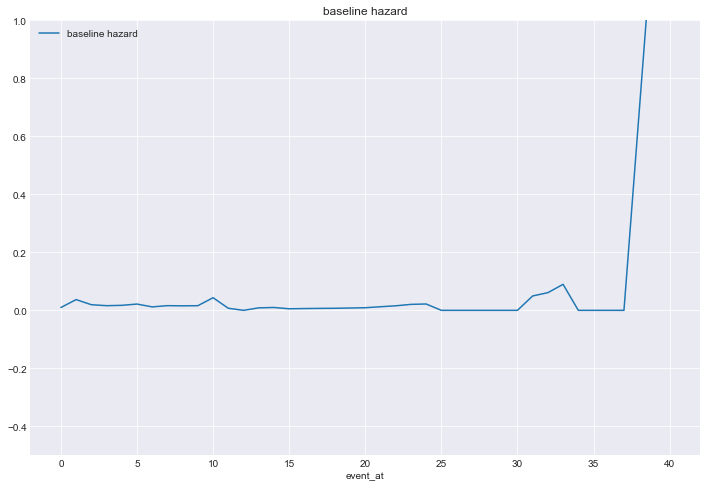

In [75]:
fig, ax = plt.subplots(figsize = (12, 8))
cph.baseline_hazard_.plot(ax = ax)

ax.set_ylim(-0.5, 1)
ax.set_title('baseline hazard')
plt.show()

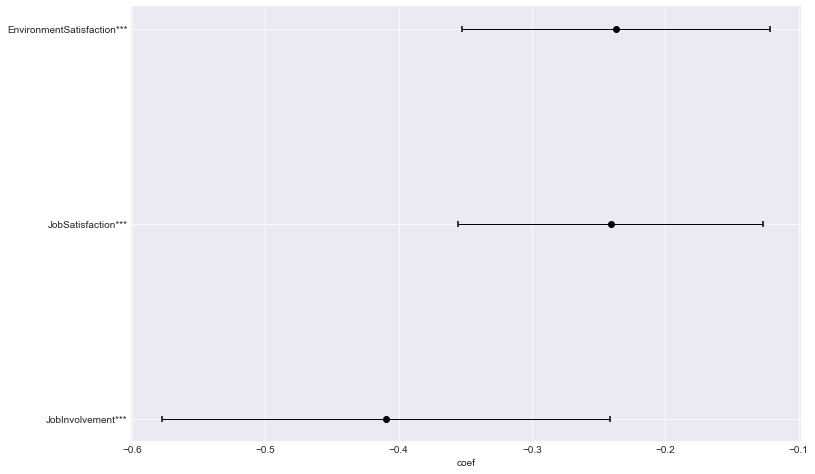

In [62]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
cph.plot(ax = ax)

plt.show()

In [81]:
cph.predict_partial_hazard(data[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction']])

,0
0,0.781984
1,1.504638
2,0.933293
3,0.619638
4,1.603990
5,0.487022
6,0.843843
7,0.619638
8,0.933293
9,0.785168


In [86]:
survival_predict = cph.predict_survival_function(data[['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction']])

In [87]:
survival_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
event_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.992415,0.985456,0.990954,0.993985,0.984503,0.995269,0.991817,0.993985,0.990954,0.992384,0.989684,0.990954,0.987799,0.992415,0.988551,0.989642,0.989684,0.996856,0.985573,0.995269,0.991883,0.981532,0.984503,0.994009,0.984440,0.992384,0.965049,0.990320,0.985573,0.984440,0.994009,0.995269,0.990954,0.995269,0.992415,0.996002,0.981680,0.995269,0.976657,0.991817,0.994009,0.990281,0.972536,0.993985,0.994009,0.990359,0.990359,0.987750,0.990398,0.996856,0.981680,0.992384,0.984440,0.981532,0.990990,0.990398,0.984440,0.987700,0.995269,0.981680,0.990398,0.995269,0.985514,0.980325,0.992384,0.993985,0.981606,0.984440,0.984440,0.990954,0.981680,0.990320,0.990320,0.987750,0.994957,0.994009,0.981532,0.990281,0.987799,0.987750,0.992883,0.985514,0.990398,0.982874,0.984503,0.989299,0.987700,0.995269,0.990990,0.990990,0.985456,0.994009,0.985456,0.981532,0.990359,0.987799,0.987799,0.990359,0.993985,0.987750,0.987700,0.990281,0.992883,0.987799,0.990990,0.990990,0.984503,0.988551,0.992883,0.992415,0.970514,0.972536,0.996856,0.990359,0.985456,0.994009,0.981532,0.992415,0.990398,0.994009,0.972536,0.990320,0.987750,0.987799,0.978262,0.985456,0.995269,0.993985,0.994009,0.987700,0.993589,0.994009,0.978262,0.992384,0.992384,0.987750,0.978349,0.990954,0.981680,0.994009,0.980325,0.994009,0.993985,0.987799,0.989299,0.990281,0.988597,0.985397,0.987700,0.

In [ ]:
survival

In [96]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Event
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [95]:
data[data['Event'] == 1][['Attrition', 'YearsAtCompany']]

,Attrition,YearsAtCompany
0,Yes,6
2,Yes,0
14,Yes,4
21,Yes,5
24,Yes,4
26,Yes,10
33,Yes,1
34,Yes,2
36,Yes,3
42,Yes,1


In [97]:
kmf.fit(data['YearsAtCompany'], event_observed=data['Event'], label='all')

<lifelines.KaplanMeierFitter: fitted with 1470 observations, 1233 censored>

In [105]:
cph_data = cph.baseline_survival_

In [108]:
cph_data.head()

,baseline survival
event_at,
0,0.990310
1,0.954291
2,0.935908
3,0.920988
4,0.905198


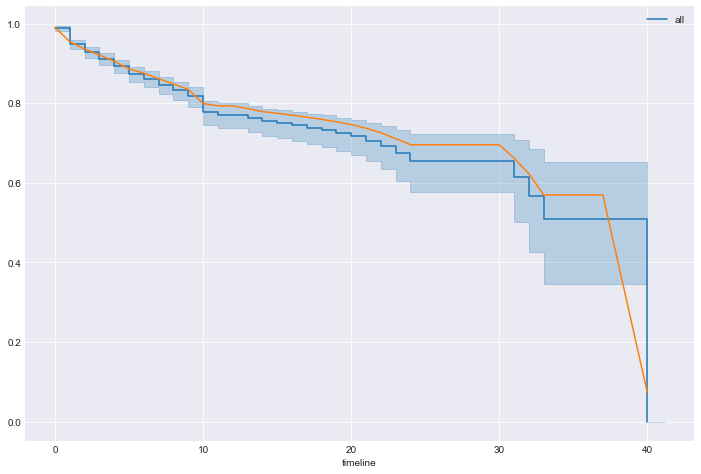

In [109]:
fig, ax = plt.subplots(figsize = (12, 8))
kmf.plot(ax = ax)
ax.plot(cph_data.index, cph_data['baseline survival'])

plt.show()

baseline_hazardとKaplan-Meierの差がほとんどないので、cox比例ハザードモデルの指数部分の影響力はほとんどない？